In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('customer_segmentation.csv')
df.head()

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration
0,130,65,213.905831,31.600751,233
1,543,46,639.223004,5.689175,228
2,221,84,180.754616,64.283300,243
3,345,77,1314.029384,12.095727,230
4,222,61,3869.409086,117.499331,257


## K-Means from Scratch

**Initializing all the variables and data**

In [3]:
data_size = 1000
num_iters = 5
num_clusters = 4

from sklearn.datasets import make_blobs
data, y = make_blobs(n_samples=2000, centers=4, n_features=2,random_state=0, cluster_std=0.5)

**Function to plot the clusters**

In [4]:
import matplotlib.pyplot as plt
def plot(data, centroids):
    plt.scatter(data[:, 0], data[:, 1], marker = '.',
                color = 'gray', label = 'data points')
    plt.scatter(centroids[:, 0], centroids[:, 1],
                color = 'red', label = 'centroid')     
    plt.legend()
    plt.xlim(-5, 12)
    plt.ylim(-10, 15)
    plt.show()

In [5]:
# Initialise centroids
centroids = data[np.random.choice(range(data.shape[0]), size = (4, ))]

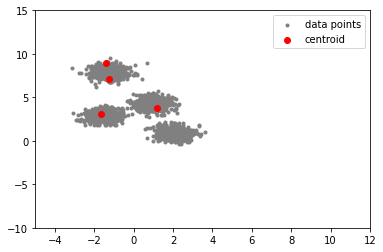

In [6]:
plot(data, centroids)

**Implementing K-means**

In [7]:
data.shape

(2000, 2)

In [8]:
centroids = data[np.random.choice(range(data.shape[0]), size = (4, ))]

In [9]:
centroids

array([[-2.02728426,  2.11999346],
       [-1.64944489,  2.52854453],
       [ 0.74125364,  4.19542159],
       [-1.31720562,  7.08528338]])

In [10]:
data

array([[-0.99610393,  2.32543854],
       [ 0.31831637,  4.07299503],
       [ 2.15418161,  0.94653906],
       ...,
       [ 1.00621742,  4.19752581],
       [-1.05850641,  3.3030477 ],
       [ 1.64016143,  4.25314658]])

In [11]:
data[0]

array([-0.99610393,  2.32543854])

In [12]:
centroids[0]

array([-2.02728426,  2.11999346])

In [13]:
# dist
((data[0] - centroids[0])**2).sum()**0.5

1.0514468867133973

In [14]:
# vectorise
((data - centroids[0])**2).sum(axis=1)**0.5

array([1.05144689, 3.05222172, 4.34300034, ..., 3.67672043, 1.52910035,
       4.24269963])

In [15]:
def euclidean(x, centroids):
    dist = np.array([]).reshape(len(x),0)
    for centroid in centroids:
        distance = (((data - centroid)**2).sum(axis=1)**0.5).reshape(-1,1)
        dist = np.hstack([dist, distance])    
    return dist

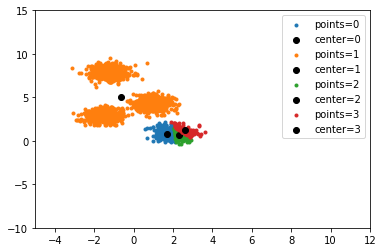

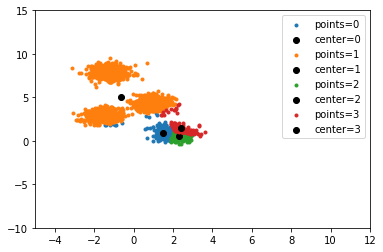

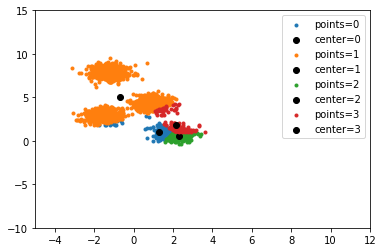

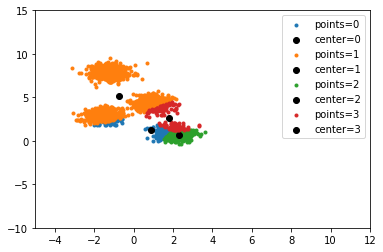

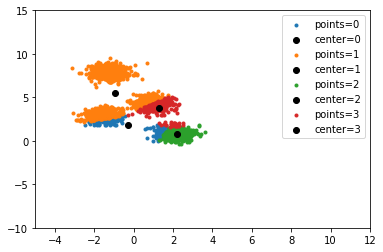

In [16]:
# Initialise centroids
centroids = data[np.random.choice(range(data.shape[0]), size = (4, ))]

# Create a list to store which centroid is assigned to each dataset
assigned_centroids = np.zeros(len(data), dtype = np.int32)


def get_closest_centroid(x, centroids):
    
    # Loop over each centroid and compute the distance from data point.
    dist = euclidean(x, centroids)

    # Get the index of the centroid with the smallest distance to the data point
    closest_centroid_index =  np.argmin(dist, axis = 1)
    
    return closest_centroid_index

animation_df = pd.DataFrame()  # only for animation

# Loop over iterations
for n in range(num_iters):  

    # Get the closest centroid
    closest_centroid = get_closest_centroid(data, centroids)
    
    # Assign the centroid to the data point.
    assigned_centroids = closest_centroid
    
    # only for animation (skip)
    adf = pd.DataFrame()
    adf[['x', 'y']] = data
    adf['color'] = assigned_centroids
    adf['size'] = 5
    cdf = pd.DataFrame()
    cdf[['x','y']] = centroids
    cdf['color'] = 'red'
    cdf['size'] = 20
    adf = pd.concat([adf, cdf])
    adf['frame'] = n
    animation_df = pd.concat([animation_df, adf])


    # Loop over centroids and compute the new ones.
    for c in range(len(centroids)):
        # Get all the data points belonging to a particular cluster
        cluster_data = data[assigned_centroids == c]
        
        # Compute the average of cluster members to compute new centroid
        new_centroid = cluster_data.mean(axis = 0)
        
        # assign the new centroidq
        centroids[c] = new_centroid

        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], marker = '.', label = f'points={c}')
        plt.scatter(centroids[c][0], centroids[c][1], color = 'black', label = f'center={c}')     
    plt.legend()
    plt.xlim(-5, 12)
    plt.ylim(-10, 15)
    plt.show()
    # plot(data, centroids)

**Animation**

In [1]:
import plotly.express as px

px.scatter(animation_df, x="x", y="y", animation_frame="frame", color="color", size='size', width=800, height=600)

ModuleNotFoundError: No module named 'plotly'

In [18]:
df.head()

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration
0,130,65,213.905831,31.600751,233
1,543,46,639.223004,5.689175,228
2,221,84,180.754616,64.283300,243
3,345,77,1314.029384,12.095727,230
4,222,61,3869.409086,117.499331,257


## Case Study

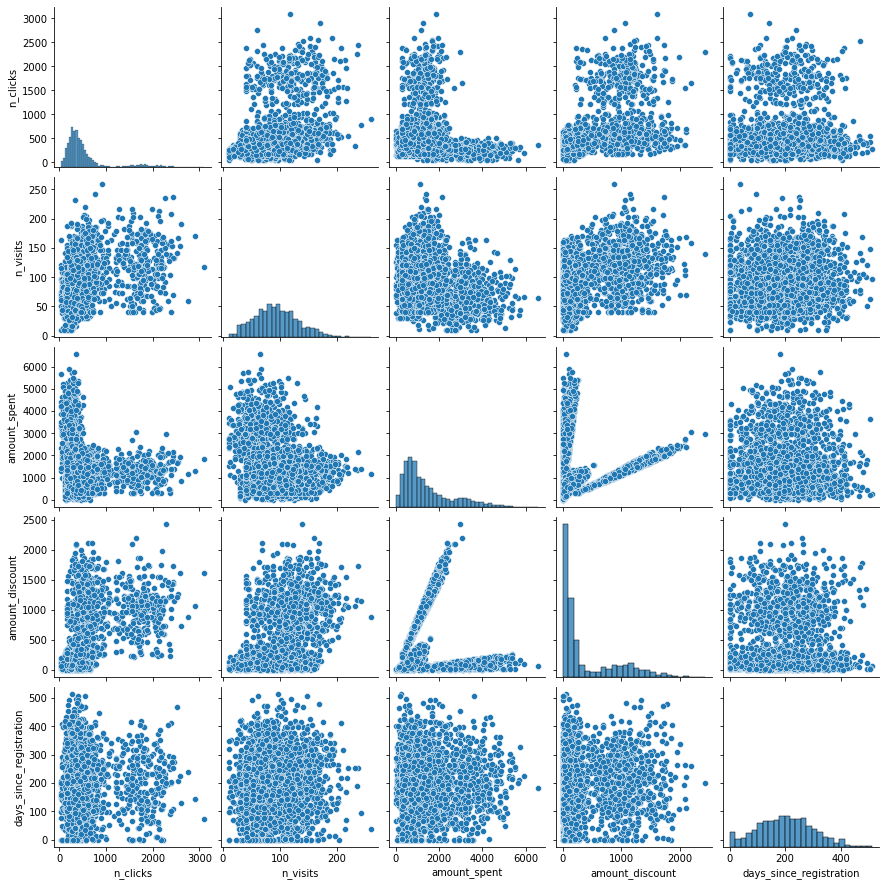

In [19]:
sns.pairplot(df)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2479 entries, 0 to 2478
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   n_clicks                 2479 non-null   int64  
 1   n_visits                 2479 non-null   int64  
 2   amount_spent             2479 non-null   float64
 3   amount_discount          2479 non-null   float64
 4   days_since_registration  2479 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 97.0 KB


In [21]:
X = df.copy()
X.describe()

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration
count,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000
mean,551.171843,94.605889,1457.332337,391.799755,201.060508
std,493.198719,38.922762,1164.965784,487.883553,99.289638
min,50.000000,10.000000,3.055344,0.191716,0.000000
25%,276.000000,67.000000,620.995325,57.592865,130.000000
50%,390.000000,92.000000,1041.661446,138.483623,200.000000
75%,569.000000,119.000000,1959.681861,689.631745,268.000000
max,3092.000000,259.000000,6567.402267,2428.406527,514.000000


In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

Let's use K-means from scikit learn library.

In [44]:
from sklearn.cluster import KMeans

k = 4 
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

Let's try to see what did the Kmeans predict?
- It predicted the cluster labels for all the points.

In [45]:
y_pred

array([3, 3, 3, ..., 1, 3, 1], dtype=int32)

We can even retrieve the coordinates of centroids of clusters.

In [46]:
##coordinates of the cluster centers
kmeans.cluster_centers_

array([[0.11701587, 0.31167127, 0.11476371, 0.06828295, 0.2375144 ],
       [0.35171102, 0.46514583, 0.21897782, 0.4746782 , 0.39461313],
       [0.06686535, 0.2313237 , 0.51962211, 0.03474996, 0.38219883],
       [0.11754788, 0.33686821, 0.11152756, 0.06744946, 0.56385268]])

### Visualizing clusters

Let's create a dataframe where we will add a new column 'label' which will consist of the cluster labels assigned by k-means, for visualization purpose.

In [47]:
clusters = pd.DataFrame(X, columns=df.columns)
clusters['label'] = kmeans.labels_
clusters.head(3)

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,label
0,0.026298,0.220884,0.032121,0.012935,0.453307,3
1,0.162064,0.144578,0.096913,0.002264,0.443580,3
2,0.056213,0.297189,0.027070,0.026395,0.472763,3


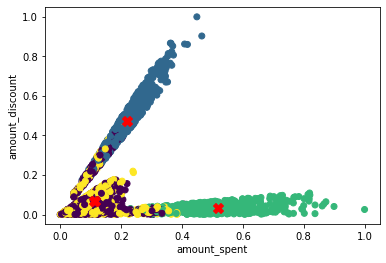

In [48]:
def viz_clusters(kmeans):
    plt.scatter(clusters['amount_spent'], clusters['amount_discount'], c=clusters['label'])
    plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], 
                color="red",
                marker="X",
                s=100)
    plt.xlabel('amount_spent')
    plt.ylabel('amount_discount')
    
viz_clusters(kmeans)

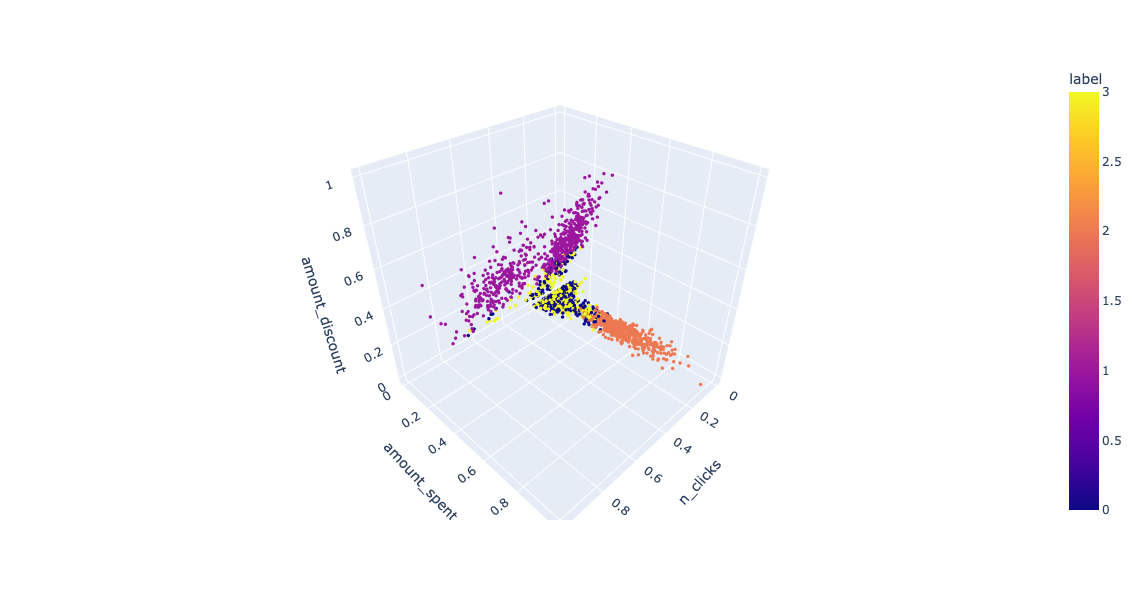

In [49]:
import plotly.express as px

fig = px.scatter_3d(clusters, x='n_clicks', y='amount_spent', z='amount_discount', color='label', width=600, height=600)
fig.update_traces(marker=dict(size=2), selector=dict(mode='markers'))
fig.show()

In [29]:
# Inertia = Within Cluster Sum of Squares
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

inertias = [model.inertia_ for model in kmeans_per_k]

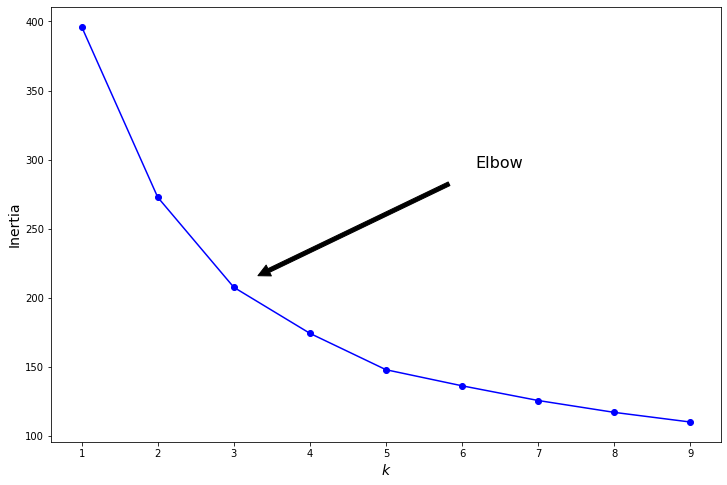

In [30]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(3, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

---

## Hierarchical CLustering for Stocks 

In [31]:
df_stocks = pd.read_csv('Stocks.csv', index_col=0)

In [32]:
df_stocks.head()

,marketCap,regularMarketVolume,earningsQuarterlyGrowth,bookValue,totalRevenue,returnOnAssets,profitMargins,earningsGrowth,return_2020
ADANIPORTS,1657751076864,12901505,-0.179,180.288,159007899648,0.00000,0.28442,-0.207,-16.891368
ASIANPAINT,3167850856448,933762,0.789,143.991,319870205952,0.00000,0.10876,0.788,-3.813726
AXISBANK,2221430013952,6403035,0.859,400.581,433654104064,0.01474,0.37225,0.855,-43.305372
BAJAJ-AUTO,996960239616,442625,-0.006,1033.043,348966289408,0.00000,0.17649,-0.007,-0.566448
BAJFINANCE,4343084089344,819955,1.590,724.584,202325999616,0.00000,0.42614,1.586,-34.809406


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_stocks)
X_stock = scaler.transform(df_stocks)

In [34]:
scaled_df = pd.DataFrame(X_stock, columns=df_stocks.columns, index=df_stocks.index)

In [35]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch

# Refer https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
Z = sch.linkage(scaled_df, method='ward') #linkage = ward

Text(0, 0.5, 'distance')

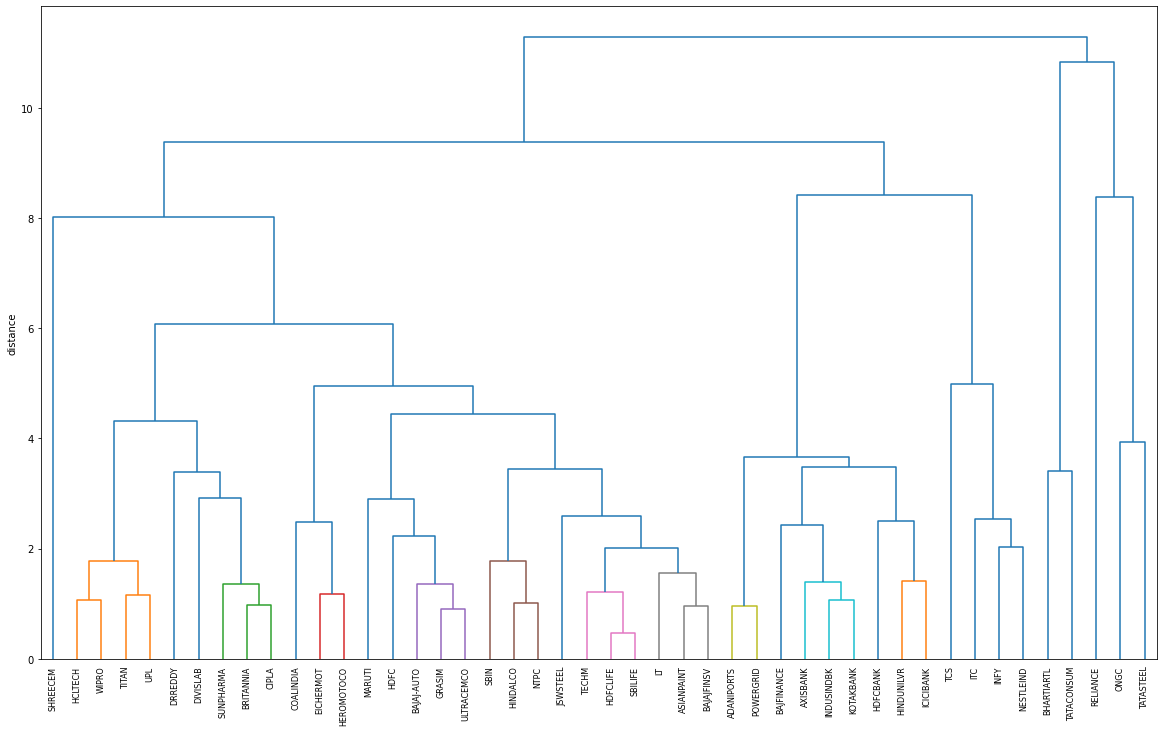

In [36]:
fig, ax = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=scaled_df.index, ax=ax, color_threshold=2)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

#### **Interpreting the Dendrogram**
- Note that we are now plotting companies that are similar to one another.
- The leaves of the tree correspond to the records.
- The length of the branch in the tree indicates the degree of dissimilarity between corresponding clusters.
- All the clusterings are made in the 8 dimensional space

#### **Insights**
- We may think that companies working in same field will have similar trends in stocks and will be clustered together.
- In some cases, this is right. For example, we can see that AXISBANK, HDFCBANK, BAJAJFINANCE will be grouped together. 
- While in some cases, it is not. Such as chances of tech companies like TCS, WIPRO, TECHMAHINDRA grouping together are only when we set the number of clusters very low.

## Hierarchical Clustering for Customer Segmentation

In [37]:
# import hierarchical clustering libraries
from sklearn.cluster import AgglomerativeClustering


# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
y_pred = hc.fit_predict(X)

In [38]:
df.columns

Index(['n_clicks', 'n_visits', 'amount_spent', 'amount_discount',
       'days_since_registration'],
      dtype='object')

In [39]:
clusters = pd.DataFrame(X, columns=df.columns)
clusters['label'] = hc.labels_
clusters.head(3)

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,label
0,0.026298,0.220884,0.032121,0.012935,0.453307,0
1,0.162064,0.144578,0.096913,0.002264,0.443580,0
2,0.056213,0.297189,0.027070,0.026395,0.472763,0


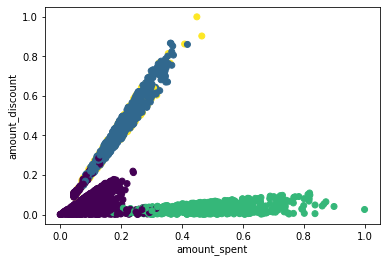

In [40]:
def viz_clusters(kmeans):
    plt.scatter(clusters['amount_spent'], clusters['amount_discount'], c=clusters['label'])
    plt.xlabel('amount_spent')
    plt.ylabel('amount_discount')
    
viz_clusters(kmeans)

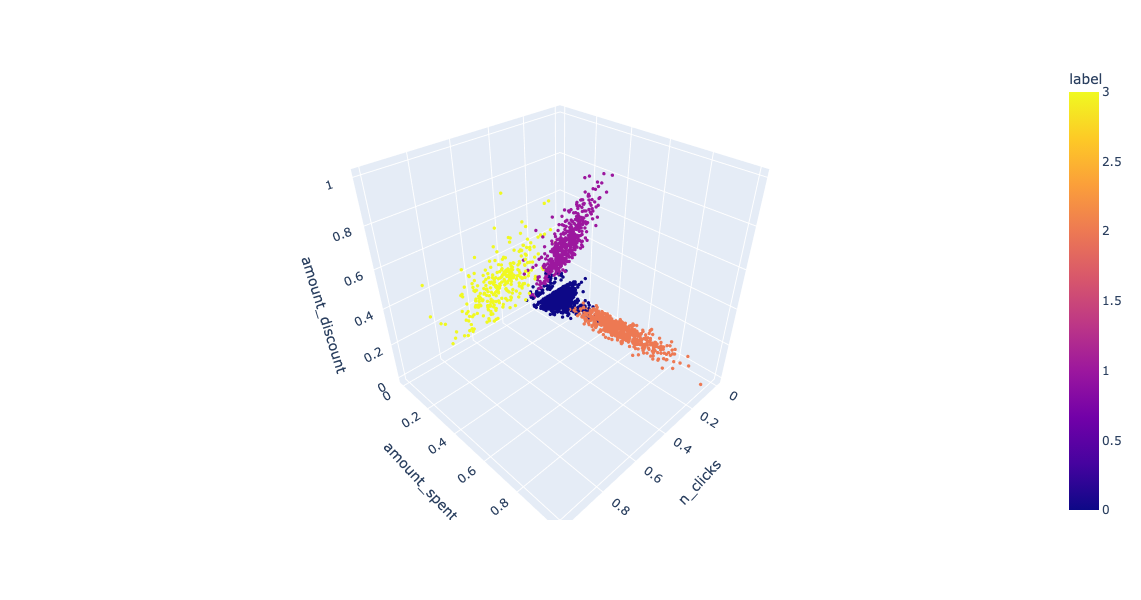

In [43]:
import plotly.express as px

fig = px.scatter_3d(clusters, x='n_clicks', y='amount_spent', z='amount_discount', color='label', width=600, height=600)
fig.update_traces(marker=dict(size=2), selector=dict(mode='markers'))
fig.show()